PYTHON ANALYSIS

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading data

In [ ]:
df = pd.read_csv("/content/Student Depression Dataset.csv")

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


**DATA CLEANING**

In [ ]:
# Handle missing values
df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)

<ipython-input-5-7dd18120f017>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)


In [ ]:
# Rename columns for clarity
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

In [ ]:
#Convert Age to integer
df['Age'] = df['Age'].astype(int)

In [ ]:
# Standardize categorical data (strip spaces, lowercase for consistency)
df['Sleep Duration'] = df['Sleep Duration'].str.strip().str.lower()
df['Dietary Habits'] = df['Dietary Habits'].str.strip().str.lower()
df['Degree'] = df['Degree'].str.strip().str.title()  # Capitalize each word

In [ ]:
import os
# Save the cleaned dataset
cleaned_file_path = "/mnt/data/Cleaned_Student_Depression_Dataset.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

df.to_csv(cleaned_file_path, index=False)

In [ ]:
print("Data cleaning complete! Cleaned dataset saved as:", cleaned_file_path)

Data cleaning complete! Cleaned dataset saved as: /mnt/data/Cleaned_Student_Depression_Dataset.csv


**ANALYSIS**

In [ ]:
file_path = "/mnt/data/Cleaned_Student_Depression_Dataset.csv"
df = pd.read_csv(file_path)
print(df.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [ ]:
# Display summary statistics
print("Summary Statistics:\n", df.describe(include='all'))

Summary Statistics:
                    id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN  

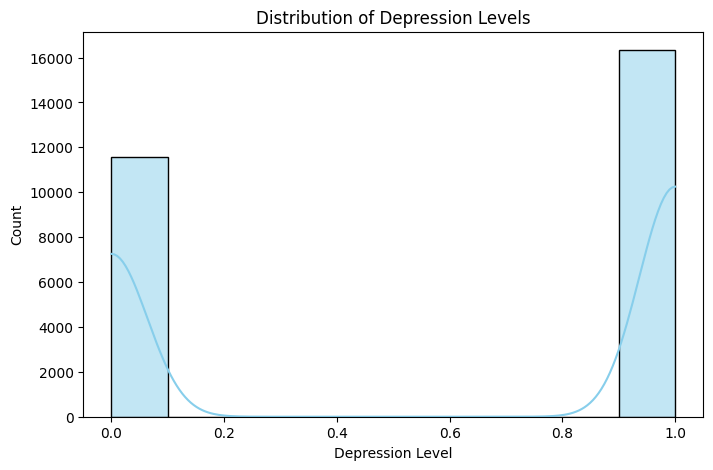

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Depression'], bins=10, kde=True, color="skyblue")
plt.title('Distribution of Depression Levels')
plt.xlabel('Depression Level')
plt.ylabel('Count')
plt.show()

<ipython-input-14-9264027ba88f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Depression'], palette="coolwarm")


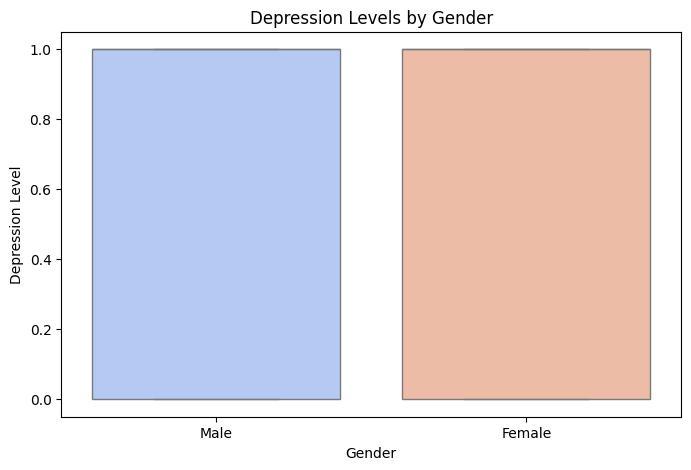

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Depression'], palette="coolwarm")
plt.title('Depression Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Depression Level')
plt.show()

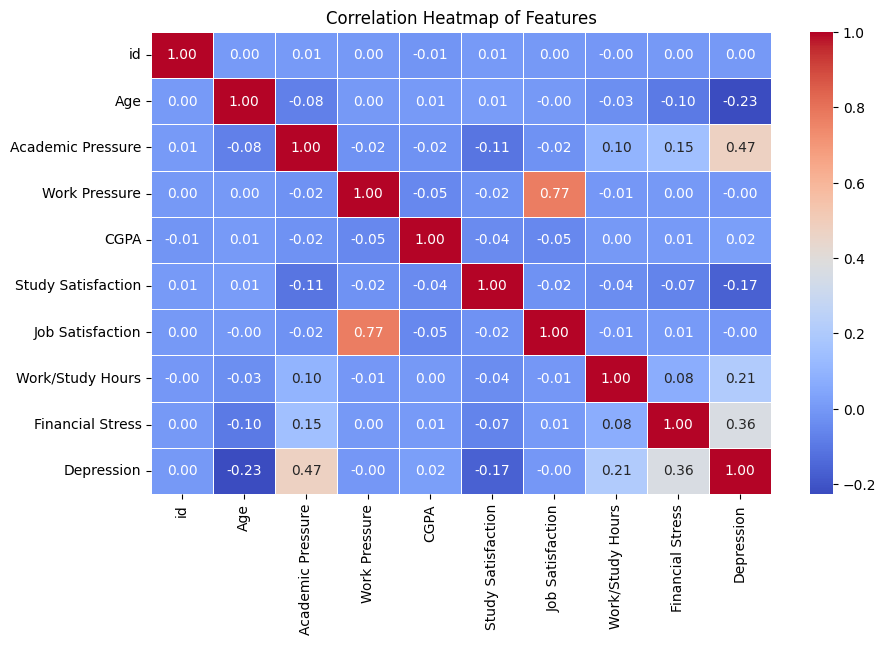

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

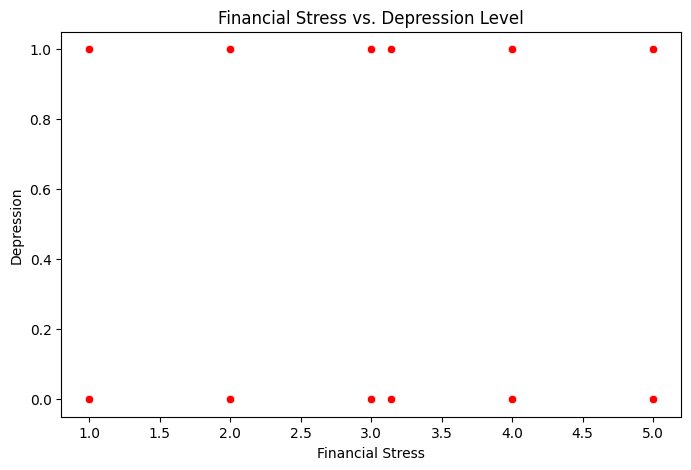

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Financial Stress'], y=df['Depression'], color="red")
plt.title("Financial Stress vs. Depression Level")
plt.xlabel("Financial Stress")
plt.ylabel("Depression")
plt.show()

statistical analysis

In [ ]:
import scipy.stats as stats

# Load the dataset
file_path = "/mnt/data/Cleaned_Student_Depression_Dataset.csv"
df = pd.read_csv(file_path)

# Convert categorical variables to strings
df['Depression'] = df['Depression'].astype(str)

# List of categorical factors to test
factors = ['Gender', 'Academic Pressure', 'Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness']

# Perform Chi-Square Test for each factor
alpha = 0.05  # Significance level
for factor in factors:
    print(f"\n Testing Relationship: {factor} vs. Depression")
    contingency_table = pd.crosstab(df[factor], df['Depression'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p:.5f}")

    if p < alpha:
        print(f"🔴 There is a significant relationship between {factor} and Depression.\n")
    else:
        print(f"🟢 No significant relationship found between {factor} and Depression.\n")



 Testing Relationship: Gender vs. Depression
Chi-Square Statistic: 0.08
Degrees of Freedom: 1
P-value: 0.77373
🟢 No significant relationship found between Gender and Depression.


 Testing Relationship: Academic Pressure vs. Depression
Chi-Square Statistic: 6427.25
Degrees of Freedom: 5
P-value: 0.00000
🔴 There is a significant relationship between Academic Pressure and Depression.


 Testing Relationship: Sleep Duration vs. Depression
Chi-Square Statistic: 276.85
Degrees of Freedom: 4
P-value: 0.00000
🔴 There is a significant relationship between Sleep Duration and Depression.


 Testing Relationship: Dietary Habits vs. Depression
Chi-Square Statistic: 1202.64
Degrees of Freedom: 3
P-value: 0.00000
🔴 There is a significant relationship between Dietary Habits and Depression.


 Testing Relationship: Family History of Mental Illness vs. Depression
Chi-Square Statistic: 79.43
Degrees of Freedom: 1
P-value: 0.00000
🔴 There is a significant relationship between Family History of Mental Il

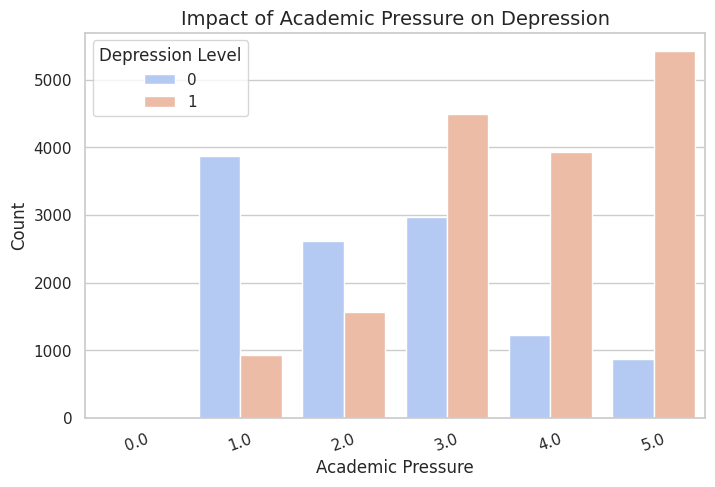

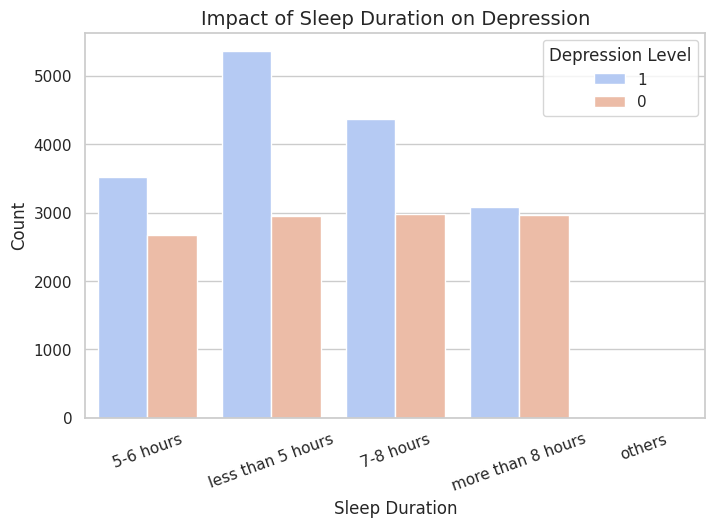

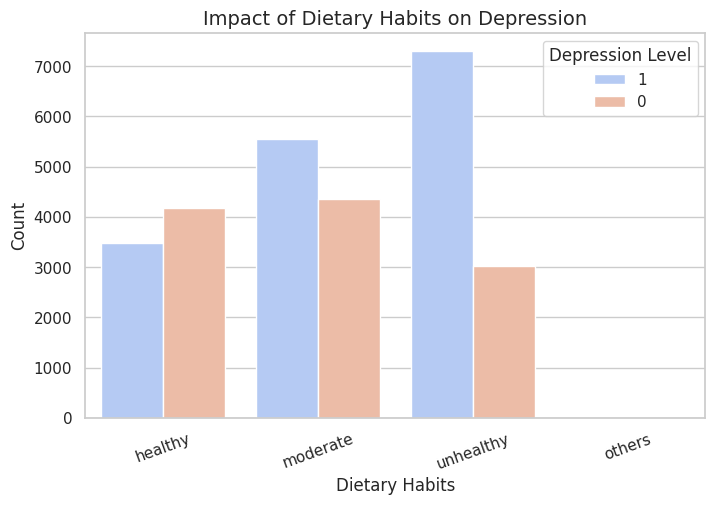

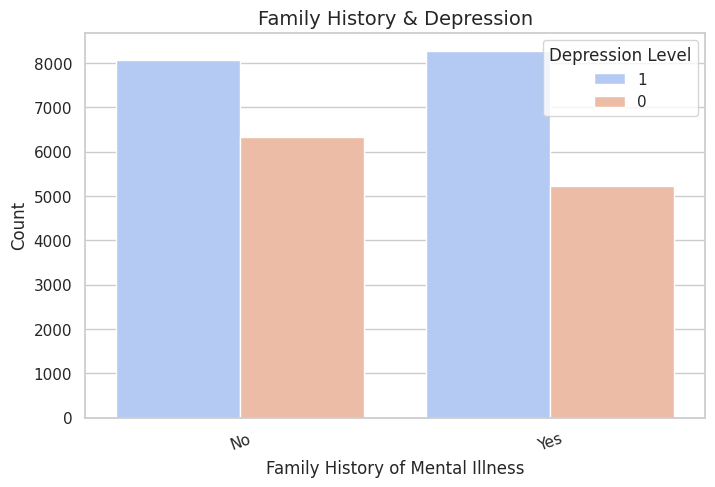

<Figure size 800x500 with 0 Axes>

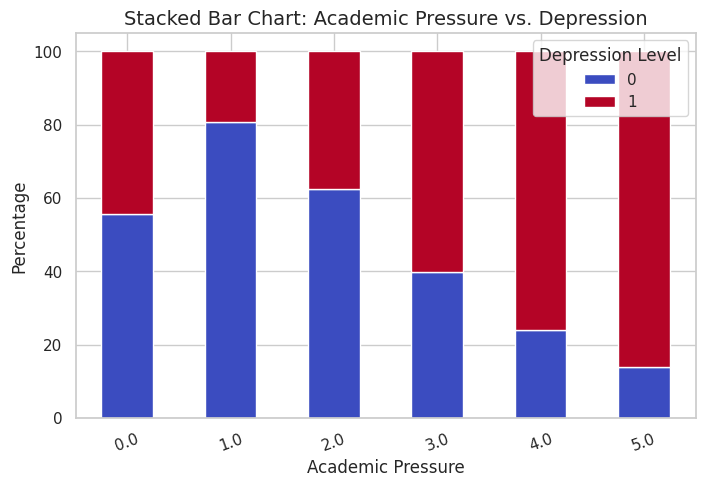

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/mnt/data/Cleaned_Student_Depression_Dataset.csv"
df = pd.read_csv(file_path)

# Convert categorical variables to string for plotting
df['Depression'] = df['Depression'].astype(str)

# Set plot style
sns.set(style="whitegrid")

# Define function to create bar plots
def plot_categorical_relationship(x, title):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=x, hue='Depression', palette="coolwarm")
    plt.title(title, fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Depression Level")
    plt.xticks(rotation=20)
    plt.show()

# 📊 Plot Significant Factors
plot_categorical_relationship("Academic Pressure", "Impact of Academic Pressure on Depression")
plot_categorical_relationship("Sleep Duration", "Impact of Sleep Duration on Depression")
plot_categorical_relationship("Dietary Habits", "Impact of Dietary Habits on Depression")
plot_categorical_relationship("Family History of Mental Illness", "Family History & Depression")

# 📊 Stacked Bar Chart
plt.figure(figsize=(8,5))
crosstab_result = pd.crosstab(df["Academic Pressure"], df["Depression"], normalize="index") * 100
crosstab_result.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("Stacked Bar Chart: Academic Pressure vs. Depression", fontsize=14)
plt.ylabel("Percentage")
plt.xticks(rotation=20)
plt.legend(title="Depression Level")
plt.show()


DEPRESSION PREDICTION

🔹 Model Accuracy: 0.83

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.83      0.82      5581



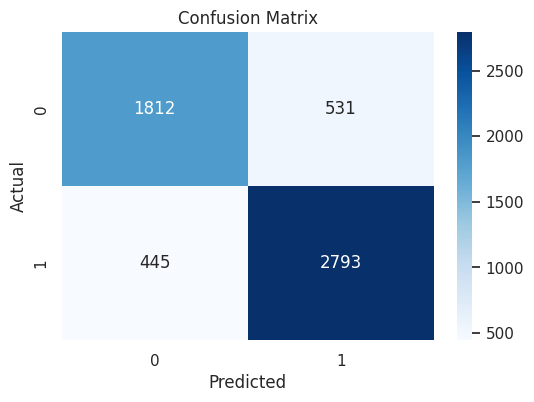

<ipython-input-19-6c8ed94fec8b>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")


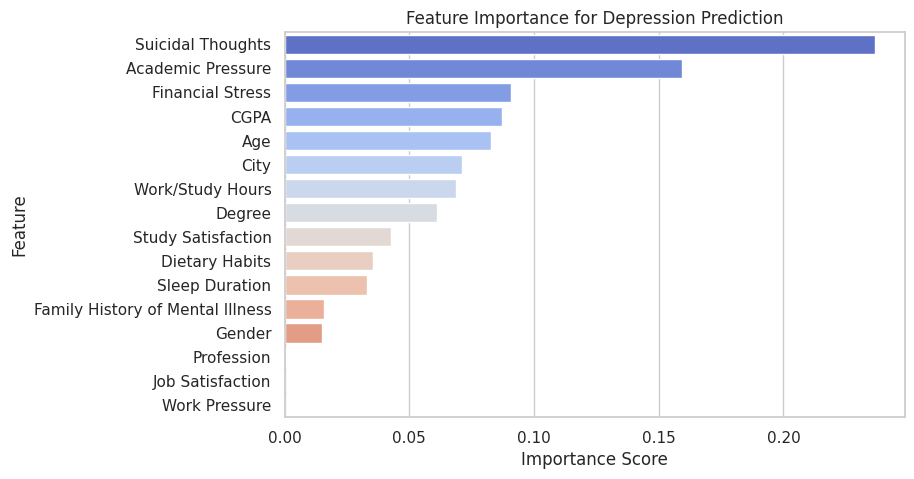

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "/mnt/data/Cleaned_Student_Depression_Dataset.csv"
df = pd.read_csv(file_path)

# Drop ID column if exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future reference

# ---->  Encode the 'Depression' column as well since it's used in the confusion matrix
le = LabelEncoder()
df['Depression'] = le.fit_transform(df['Depression'])
label_encoders['Depression'] = le # Store the encoder for 'Depression' <----


# Define features (X) and target (y)
X = df.drop(columns=['Depression'])  # Features
y = df['Depression']  # Target variable

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.2f}")

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=label_encoders['Depression'].classes_, yticklabels=label_encoders['Depression'].classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")
plt.title("Feature Importance for Depression Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()